# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import comb


This is the binomial coefficient operation writen as $n \choose k$
you can read this as n choose k

i prefer keeping values exact whenever posible thus i created this simple helper function 


In [2]:

def nck(n,k):
    return comb(n,k,exact=True)

this function will return the a data object with probabilities of drawing 2 or 3 land hands ,  probabilities of drawing 2 or 3 or 4 land hands , and probabilities of drawing 3 or 4 land hands.


In [3]:
data =[]
totalWaysToDraw7cards = nck(99,7)
def getLandCount(count):
    for landCount in range(count):
        row=[]
        waysToDraw2land = nck(landCount,2) * nck(99-landCount,5)
        waysToDraw3land = nck(landCount,3) * nck(99-landCount,4)
        waysToDraw4land = nck(landCount,4) * nck(99-landCount,3)
        row.append((waysToDraw2land+waysToDraw3land)/totalWaysToDraw7cards)
        row.append((waysToDraw4land+waysToDraw3land+waysToDraw2land)/totalWaysToDraw7cards)
        row.append((waysToDraw4land+waysToDraw3land)/totalWaysToDraw7cards)
        data.append(row)
    return data

    
    

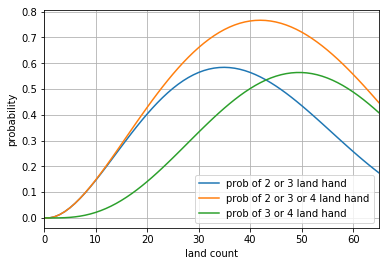

In [4]:
pData = pd.DataFrame(np.array(getLandCount(66),np.double), 
                     columns=['prob of 2 or 3 land hand',
                              'prob of 2 or 3 or 4 land hand',
                             'prob of 3 or 4 land hand'])
p=pData.plot()  

p.set(xlabel="land count", ylabel="probability")
p.grid()

missing a land drop by turn n

In [5]:
# a poc using turn 4 with 38 lands 
deck_size =99
land_count = 38
turn_count = 4
hand_size = 7
(nck(deck_size,hand_size+turn_count)- \
 nck(deck_size -land_count,hand_size + turn_count -0)- 
 nck(deck_size-land_count,hand_size + turn_count -1)- 
 nck(deck_size-land_count,hand_size + turn_count-2)- 
 nck(deck_size-land_count,hand_size + turn_count-3)
)\
/nck(deck_size,hand_size+turn_count)

0.9958067774044423

In [6]:
def get_prob_n_lands_on_turn_n(land_count):
    total_hands = nck(deck_size,hand_size+turn_count)
    top_count = total_hands
    count = nck(land_count,turn_count) * nck(deck_size-turn_count,7)
    for x in range(turn_count):
        top_count -= nck(deck_size-land_count,hand_size + turn_count -x)
        top_count -= nck(land_count,x)
    return count / total_hands
get_prob_n_lands_on_turn_n(38)

6.470913107511046

In [7]:
def get_prob_land(land_count, deck_size):
    return land_count / deck_size


In [8]:
pData.head()

,prob of 2 or 3 land hand,prob of 2 or 3 or 4 land hand,prob of 3 or 4 land hand
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.004329,0.004329,0.000000
3,0.012541,0.012541,0.000223
4,0.024207,0.024217,0.000865


In [9]:
def probOfGoodHand(land,elf):
    waysToDraw2land = nck(land,2) * nck(99-land,5)
    waysToDraw3land = nck(land,3) * nck(99-land,4)
    waysToDraw4land = nck(land,4) * nck(99-land,3)
    waysToDraw2landAnd2orMoreElf = nck(land,2) *nck(elf,2)* nck(99-land,3)
    waysToDraw3landAnd1orMoreElf = nck(land,3) *nck(elf,1)* nck(99-land,3)
    return (waysToDraw3landAnd1orMoreElf + waysToDraw4land + waysToDraw2landAnd2orMoreElf)/totalWaysToDraw7cards

 
    


data=[]
for landCount in range(80):
    col=[]
    for elfCount in range(30):
        row=[]
        waysToDraw2land = nck(landCount,2) * nck(99-landCount,5)
        waysToDraw3land = nck(landCount,3) * nck(99-landCount,4)
        waysToDraw4land = nck(landCount,4) * nck(99-landCount,3)
        waysToDraw2landAnd2elf = nck(landCount,2) *nck(elfCount,2)* nck(99-landCount,3)
        row.append((waysToDraw2land+waysToDraw3land)/totalWaysToDraw7cards)
    col.append(row)
    data.append(col)
#pData = pd.DataFrame(np.array(data,np.double), columns=['prob of 2 or 3 land hand','prob of 2 or 3 or 4 land hand'])
#p=pData.plot()
#p.set(xlabel="land count", ylabel="probability")
#$p.grid()

    

(0, 1)

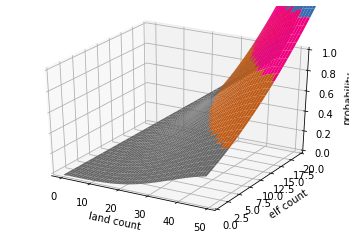

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 50, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([probOfGoodHand(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z,cmap=cm.Accent_r)

ax.set_xlabel('land count')
ax.set_ylabel('elf count')
ax.set_zlabel('probability') 
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,1)



In [11]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)

print(Z) 


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.64785259e-01
  2.72191839e-01 2.78952160e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.88856646e-01
  2.96386670e-01 3.03208869e-01]
 [0.00000000e+00 0.00000000e+00 9.90392205e-06 ... 3.14532792e-01
  3.22159424e-01 3.29013879e-01]
 ...
 [0.00000000e+00 0.00000000e+00 1.07061397e-02 ... 3.13088509e+00
  3.11508438e+00 3.09273047e+00]
 [0.00000000e+00 0.00000000e+00 1.11716241e-02 ... 3.23038016e+00
  3.21344163e+00 3.18975730e+00]
 [0.00000000e+00 0.00000000e+00 1.16470123e-02 ... 3.33147998e+00
  3.31337680e+00 3.28833244e+00]]


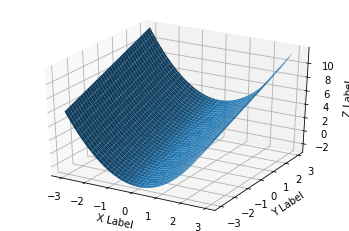

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
  return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

['non land',
 'non land',
 'non land',
 'non land',
 'non land',
 'non land',
 'non land']

In [59]:
import random
import numpy as np
from statistics import mean

sim_time=9999
results_array = []
for current_land_count in range(50):    
    results=[]
    deck = ['non land' for _ in range(deck_size - current_land_count)] + ['land' for _ in range(current_land_count)]
    for _ in range(sim_time):
        random.shuffle(deck)
        turn =0
        hand = []
        for card in deck:
            hand.append(card)
        for turn in range(len(deck)//2):
            lc=0
            for card in hand[:turn+7]:
                if card == 'land':
                    lc += 1

            if lc >= turn:
                pass
            else:
                break
        results.append(turn)
    results_array.append( mean(results))    

[1,
 1.0784078407840785,
 1.166916691669167,
 1.2478247824782478,
 1.3273327332733273,
 1.4173417341734174,
 1.505950595059506,
 1.6003600360036003,
 1.7043704370437043,
 1.7971797179717972,
 1.8933893389338934,
 1.9982998299829984,
 2.0969096909690967,
 2.1913191319131915,
 2.2813281328132815,
 2.4112411241124114,
 2.510851085108511,
 2.627862786278628,
 2.769176917691769,
 2.8650865086508652,
 2.9816981698169815,
 3.1293129312931294,
 3.261826182618262,
 3.3664366436643665,
 3.5137513751375136,
 3.6737673767376737,
 3.7945794579457948,
 3.991799179917992,
 4.083408340834083,
 4.2587258725872585,
 4.448044804480448,
 4.564356435643564,
 4.7478747874787475,
 4.908990899089909,
 5.1046104610461045,
 5.288528852885289,
 5.486048604860486,
 5.687068706870687,
 5.952695269526953,
 6.132413241324133,
 6.297429742974297,
 6.533453345334533,
 6.845984598459846,
 7.059005900590059,
 7.264326432643264,
 7.519051905190519,
 7.811981198119812,
 8.114511451145114,
 8.401640164016401,
 8.6445644564

for land count show average number of turns before missing land drop

In [60]:
import math
import pandas as pd
df = pd.DataFrame(results_array)
# print(max(results),min(results),df.mean())
# print(f'how many potential games simulated {sim_time / math.factorial(deck_size)}')
df

,0
0,1.000000
1,1.078408
2,1.166917
3,1.247825
4,1.327333
5,1.417342
6,1.505951
7,1.600360
8,1.704370
9,1.797180
